<a href="https://colab.research.google.com/github/HiwaTase/Machine-Learning/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step1**

In [17]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HiwaTase/Machine-Learning/main/healthINS_balanced.csv'

df = pd.read_csv(url)

In [18]:
import pandas as pd

# Drop columns
df = df.drop(["WKSWORK2", "classwkr", "empstat", "vetstat","school","cit2","metro","region"], axis=1)

# Top-code the 'inctot' column
df['inctot'] = df['inctot'].apply(lambda x: min(max(x, 0), 500000))

print(df.isnull().sum())



nohealthins    0
marst          0
race2          0
inctot         0
uhrswork       0
age            0
educ_att       0
female         0
dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('nohealthins', axis=1)
y = df['nohealthins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set target class distribution:")
print(y_train.value_counts())

print("\nTesting set target class distribution:")
print(y_test.value_counts())


Training set target class distribution:
nohealthins
1    29704
0    26184
Name: count, dtype: int64

Testing set target class distribution:
nohealthins
1    7427
0    6546
Name: count, dtype: int64


In [23]:
df.head()

,nohealthins,marst,race2,inctot,uhrswork,age,educ_att,female
0,0,"Married, spouse present",white,36300,0,71,HS or GED,0
1,0,Widowed,white,12500,0,68,Less than HS,1
2,0,Widowed,white,24100,32,44,Less than HS,1
3,0,"Married, spouse absent",latino,10900,0,87,Less than HS,1
4,0,"Married, spouse present",white,24200,16,77,HS or GED,0



**Step2**

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Print the original features
print("Original features:\n", list(X_train.columns), "\n")

# Apply ColumnTransformer
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['inctot', 'age', 'uhrswork']),
     ("onehot", OneHotEncoder(sparse=False), ['marst', 'race2', 'educ_att'])],
    remainder='passthrough'
)



Original features:
 ['marst', 'race2', 'inctot', 'uhrswork', 'age', 'educ_att', 'female'] 



In [26]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# Convert the transformed data back to a DataFrame for better visualization
feature_names = ct.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Print the transformed features
print("Transformed training set features:\n", X_train_transformed_df.head())

# Print the distribution of target classes in training and testing sets
print("Training set target class distribution:")
print(y_train.value_counts())

print("\nTesting set target class distribution:")
print(y_test.value_counts())

Transformed training set features:
    scaling__inctot  scaling__age  scaling__uhrswork  onehot__marst_Divorced  \
0        -0.646781     -0.435304          -1.155417                     0.0   
1         1.535379      0.866503           1.162346                     0.0   
2        -0.646781     -1.567311          -1.155417                     0.0   
3        -0.354845      1.998509          -1.155417                     0.0   
4        -0.646781     -0.039102          -1.155417                     0.0   

   onehot__marst_Married, spouse absent  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   onehot__marst_Married, spouse present  onehot__marst_Never married/single  \
0                                    0.0                                 1.0   
1                                    1.0                              

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Step3**

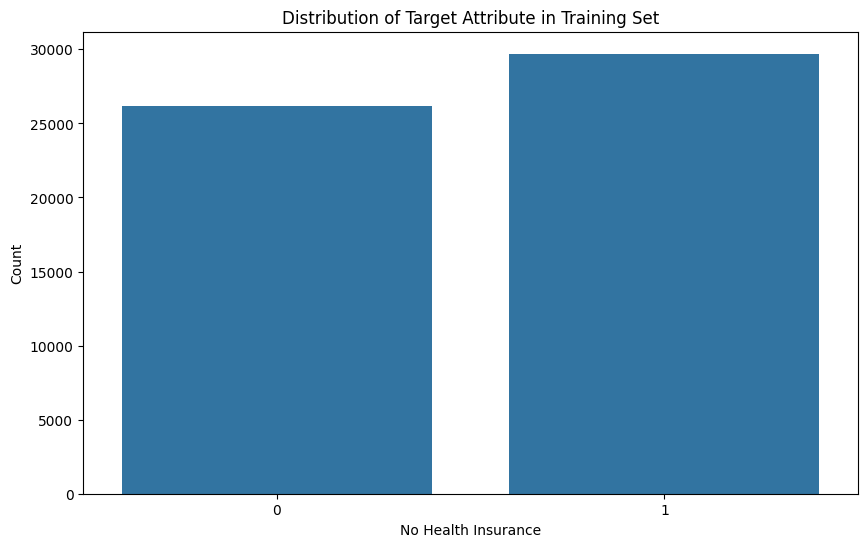

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Target Attribute in Training Set')
plt.xlabel('No Health Insurance')
plt.ylabel('Count')
plt.show()